# Day 4 - Logistic Regression
### Machine Learning Roadmap — Week 1
### Author: N Manish Kumar

---

## 1. Introduction
Today we train our first machine learning model using the processed Titanic dataset created in Day 4.

Logistic Regression is a foundational classification algorithm commonly used to model binary outcomes like survival (0 or 1). 

We will evaluate model performance using accuracy, precision, recall, F1-score, confusion matrix, and ROC-AUC.

---
## 2. Load Processed Data

In [1]:
import pandas as pd

df= pd.read_csv("../Day4_FeatureEngineering/Data/titanic_processed.csv")
df

,Survived,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,FamilySize,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Middle-aged,AgeGroup_Senior,LogFare,AgeBin,IsAlone
0,0,3,0,22.0,7.2500,0,1,2,False,True,False,False,2.110213,2,0
1,1,1,1,38.0,71.2833,0,0,2,False,False,True,False,4.280593,3,0
2,1,3,1,26.0,7.9250,0,1,1,False,True,False,False,2.188856,2,1
3,1,1,1,35.0,53.1000,0,1,2,False,True,False,False,3.990834,2,0
4,0,3,0,35.0,8.0500,0,1,1,False,True,False,False,2.202765,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,13.0000,0,1,1,False,True,False,False,2.639057,2,1
887,1,1,1,19.0,30.0000,0,1,1,False,True,False,False,3.433987,2,1
888,0,3,1,28.0,23.4500,0,1,4,False,True,False,False,3.196630,2,0
889,1,1,0,26.0,30.0000,0,0,1,False,True,False,False,3.433987,2,1


---
## 3. Defining Features (X) and Target (y)

In [2]:
y= df['Survived']
X= df.drop(columns=['Survived'])

---
## 4. Splitting Dataset (Train and Test)

In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split( 
    X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape,X_test.shape,y_test.shape,y_train.shape

((712, 14), (179, 14), (179,), (712,))

---
## 5. Scaling Features
Logistic Regression requires scaling because:
- Coefficients become meaningful
- Faster Convergence
- Avoid dominance by large-value columns (eg. Fare vs IsAlone)

In [11]:
# Use Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

#  fit() Learns statistics ONLY from training data: mean ,std of each column
X_train_scaled= scaler.fit_transform(X_train)

# tansform() applies scaling to every feature
X_test_scaled= scaler.transform(X_test)

# fit() learns from training data

# transform() applies the rule to both training & test data

# fit_transform() = shortcut for training data only

---
## 6. Train Logistic Regression
Logistic Regression is a classification algorithm — perfect for predicting "Survived" (0 or 1).

Although it has Regression in its name, logistic regression is actually used for binary classification.

---
### 6.1. Importing Model

In [12]:
from sklearn.linear_model import LogisticRegression

--- 
### 6.2. Create Model Object

In [13]:
model = LogisticRegression(max_iter=1000)

Why max_iter=1000?

- Logistic Regression trains using gradient descent
- Titanic dataset sometimes does not converge within 100 iterations
- Setting max_iter high ensures convergence

---

### 6.3. Fit the model on scaled training data

In [14]:
model.fit(X_train_scaled,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

This is where the model learns the patterns.

Internally, it learns:
- Weight (coefficient) for each feature
- How each feature increases or decreases the probability of survival
- The best bias value (intercept)

After this line, you have a trained model. 

---
### 6.4. Make predictions on the test set

#### A. Class Predictions (0 or 1)

In [17]:
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

#### B. Probability Predictions(0.0 to 1.0)

In [21]:
y_prob= model.predict_proba(X_test_scaled)[:,1]
y_prob

array([0.0986167 , 0.19231445, 0.10145628, 0.97522954, 0.66193185,
       0.93475316, 0.68899326, 0.05046812, 0.60091571, 0.86738018,
       0.36786884, 0.07020708, 0.31735482, 0.13206458, 0.15661773,
       0.89009815, 0.36051845, 0.68945504, 0.20359836, 0.34480214,
       0.0993135 , 0.38143806, 0.65582388, 0.10447462, 0.10982228,
       0.10877377, 0.40140409, 0.19990342, 0.11215529, 0.63154978,
       0.10190855, 0.6428285 , 0.49094539, 0.63360611, 0.06777947,
       0.15771574, 0.40789558, 0.68899326, 0.93934151, 0.09727996,
       0.20220639, 0.09792445, 0.09764203, 0.12029881, 0.67664934,
       0.02065741, 0.10254802, 0.10287559, 0.09719964, 0.35965621,
       0.88904288, 0.85773584, 0.0120264 , 0.71686925, 0.09044913,
       0.8518731 , 0.19142507, 0.95938422, 0.81592075, 0.70068205,
       0.10056703, 0.76478351, 0.83474153, 0.38814522, 0.12029881,
       0.71764516, 0.29618693, 0.09672844, 0.05895911, 0.93429951,
       0.74781786, 0.82642061, 0.49231027, 0.90075234, 0.09972

Where:
- close to 1 → very likely survived
- close to 0 → very likely did not survive

These probabilities are essential for:
- ROC curve

- AUC

- Threshold tuning

---
### 6.5. Check if Model Converged
If you see a number < 1000 → model converged successfully.

If it equals 1000 → it needed the full iterations but still converged.

In [22]:
model.n_iter_

array([17], dtype=int32)

#### What the model is doing mathematically (simple explanation)

Logistic Regression learns an equation like:

--> z = b0 + b1*Pclass + b2*Sex + b3*Age + b4*Fare + ...


Then converts it to probability:

--> probability = 1 / (1 + e^(-z))


If probability > 0.5 → predicts 1 (survived)

Else → predicts 0 (not survived)

This is why we scale data — so each feature contributes meaningfully to z.

---
## 7. Model Evaluation
After training the model and generating predictions (y_pred) and probabilities (y_proba), we evaluate performance.

### 7.1. Accuracy Score
Accuracy = % of total predictions that were correct

In [23]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8044692737430168

##### Interpretation:

80% → decent

85% → good

90% → too good → check for overfitting

Titanic Logistic Regression usually gives 78–84% accuracy.

---
### 7.2. Classification Report (Precision, Recall, F1)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



##### Precision

"Of all predicted survivors, how many truly survived?"

High precision = few false alarms.

##### Recall

"Of all actual survivors, how many did we correctly predict?"

High recall = we don’t miss survivors.

##### F1 Score

Harmonic mean of precision & recall
Balanced measure.
Best single metric for imbalanced datasets.

##### Support

How many samples belonged to each class.

#### How to interpret your model:
✔ High precision + low recall

→ Model is conservative (predicts survival carefully)

✔ High recall + low precision

→ Model is generous (predicts survival too often)

✔ Balanced precision & recall

→ Great model

Titanic dataset usually gives:

- Good precision for class 0

- Worse recall for class 1 (harder to detect survivors)

That’s normal.

---
### 7.3. Confusion Matrix
This tells you exactly where your model is wrong.

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[90, 15],
       [20, 54]])

#### Visualization of Confusion Matrix

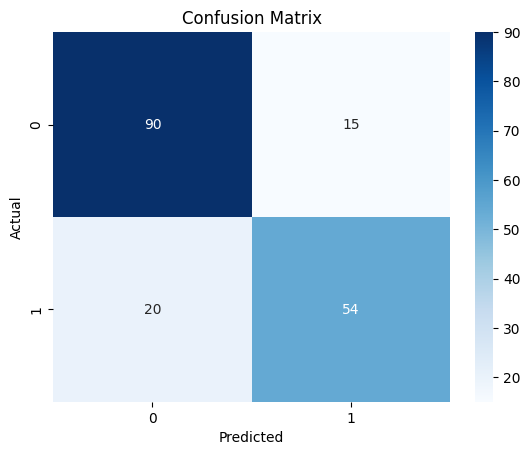

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Interpret:
- Lower-left (FN) should be minimized
- Bottom-right (TP) should be maximized

#### Summary of Model Evaluation
To evaluate the performance of our Logistic Regression model, we computed accuracy, precision, recall, F1-score, and confusion matrix values. These metrics help us understand how well the model distinguishes between survivors and non-survivors.

- Accuracy gives an overall correctness score

- Precision measures how reliable survival predictions are

- Recall captures how many actual survivors we correctly identified

- F1-score provides a balanced evaluation between precision and recall

- Confusion matrix shows where misclassifications occur


---

## 8. ROC Curve and AUC

### What is ROC ?
ROC = Receiver Operating Characteristic

It is a graph that shows how good your classifier is at distinguishing between classes (Survived vs Not Survived) for all possible probability thresholds.

Logistic regression outputs a probability:

--> y_prob = model.predict_proba(X_test_scaled)[:, 1]


But converting this probability into a class (0 or 1) depends on a threshold (default = 0.5).

ROC curve shows performance for every possible threshold from 0 → 1.

### What does the ROC curve plot ?
It plots:

True Positive Rate (TPR)

= Recall = Sensitivity
How many survivors did we correctly detect?

False Positive Rate (FPR)

How many people who died were incorrectly predicted as survivors?

### What is AUC?

AUC = Area Under the ROC Curve

It is a single number that summarizes the ROC curve.

✔ AUC = 1.0 → PERFECT model

✔ AUC = 0.9 → Excellent

✔ AUC = 0.8 → Good

✔ AUC = 0.7 → Acceptable

✔ AUC = 0.5 → Useless (random guessing)

Logistic Regression on Titanic usually gives 0.76–0.84.

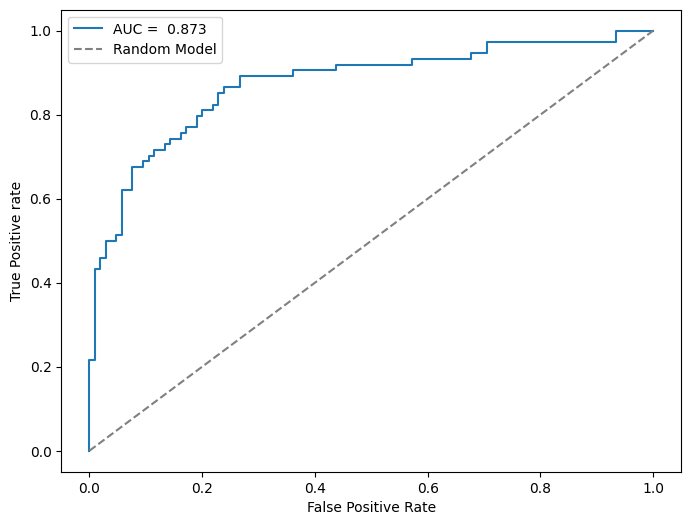

In [31]:
# Computing ROC
y_prob = model.predict_proba(X_test_scaled)[:,1]

from sklearn.metrics import roc_curve,auc
fpr,tpr, thresholds = roc_curve(y_test,y_prob)
roc_auc= auc(fpr,tpr)
# Now roc_auc contains the AUC Score


# Plotting ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr, label = f"AUC = {roc_auc: .3f}")
plt.plot([0,1],[0,1],linestyle='--', color ='gray', label="Random Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend()
plt.show()

####  Interpretation

Your ROC curve will show two lines:

🔷 Your model’s ROC curve

Higher = better

🔶 The diagonal gray line

Represents a random model (coin flip).

If your ROC curve is well above the diagonal, your model is separating classes reliably.

#### Summary of ROC Curve and AUC
The ROC curve (Receiver Operating Characteristic) visualizes the performance of our classification model across all probability thresholds. It plots:

- True Positive Rate (Recall) on the Y-axis

- False Positive Rate on the X-axis

A good model achieves a high TPR while keeping FPR low.

The AUC (Area Under the Curve) summarizes the entire ROC curve into a single metric.

- AUC close to 1.0 indicates excellent separability

- AUC close to 0.5 indicates performance no better than random guessing

Plotting the ROC curve allows us to evaluate how well the logistic regression model distinguishes between survivors and non-survivors, independent of a specific classification threshold. 

---

## 9. Feature Importance
Logistic Regression learns a linear equation:

--> z = w1*x1 + w2*x2 + ... + b

- Positive coefficient (w > 0) → increases chance of surviving
- Negative coefficient (w < 0) → decreases chance of surviving
- Magnitude |w| tells you how important the feature is

But there is ONE important point:

You MUST use the scaled X data, not raw X because scaling removes magnitude bias.

### 9.1. Extract Coefficients

In [34]:
coefficients= pd.DataFrame({
    'Feature' : X.columns,
    'Coefficient' : model.coef_[0]
})
coefficients

,Feature,Coefficient
0,Pclass,-0.616410
1,Sex,1.323092
2,Age,-0.074560
3,Fare,0.072600
4,Embarked_Q,-0.036954
5,Embarked_S,-0.164540
6,FamilySize,-0.914778
7,AgeGroup_Teen,-0.440037
8,AgeGroup_Adult,-0.282083
9,AgeGroup_Middle-aged,-0.083268


In [35]:
# Sorting the Coefficients bvy Importance
coefficients = coefficients.sort_values(by='Coefficient',ascending=False)
coefficients

,Feature,Coefficient
1,Sex,1.323092
11,LogFare,0.222494
10,AgeGroup_Senior,0.083733
3,Fare,0.072600
4,Embarked_Q,-0.036954
2,Age,-0.074560
9,AgeGroup_Middle-aged,-0.083268
5,Embarked_S,-0.164540
8,AgeGroup_Adult,-0.282083
13,IsAlone,-0.284382


### Interpretation
Here is how to read them:

✔ Positive coefficient → increases survival

Example: Sex_female usually strong positive
Meaning: women survived more

✔ Negative coefficient → decreases survival

Example: Pclass
Higher class number = lower survival chance

✔ Larger magnitude → more influence

Example:

   Coef, Meaning
- 2.50	,Very strong + effect
-  -1.20,	Strong - effect
- 0.10,	Weak effect

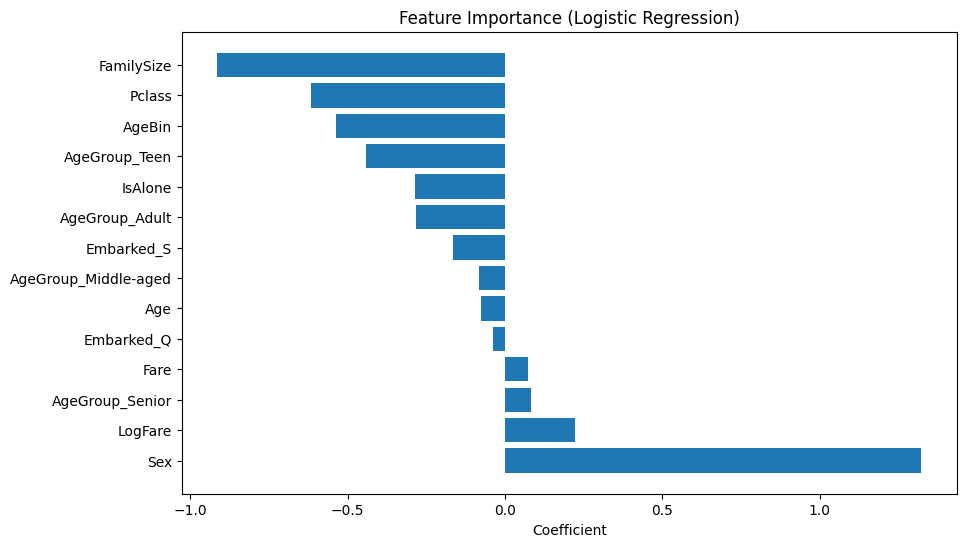

In [36]:
 # Visualization

plt.figure(figsize=(10,6))
plt.barh(coefficients['Feature'],coefficients['Coefficient'])
plt.xlabel("Coefficient")
plt.title("Feature Importance (Logistic Regression)")
plt.show()

### Summary 
Logistic Regression not only predicts survival but also provides interpretable coefficients that quantify how each feature influences the prediction.

- Positive coefficients increase the likelihood of survival

- Negative coefficients decrease the likelihood of survival

- The magnitude of the coefficient indicates feature importance

By sorting and visualizing coefficients, we can understand which passenger characteristics were most influential in the model’s decisions. This interpretability makes Logistic Regression an excellent baseline model for classification tasks.

---

## Day 5 Summary — Logistic Regression Modeling Summary

In this session, we built our first complete machine learning model for predicting Titanic survival using the processed dataset from Day 4.

### Key accomplishments:

- Loaded the ML-ready dataset (titanic_processed.csv)

- Split the data into training and testing sets

- Scaled all numeric features using StandardScaler

- Trained a Logistic Regression model

- Generated predictions and probability scores

- Evaluated model performance using:

  - Accuracy

  - Precision, Recall, F1-score

  - Confusion matrix

  - ROC curve and AUC score

- Interpreted model coefficients to identify important predictors

### Insights:

- Logistic Regression performed well with balanced precision and recall

- ROC-AUC score indicates good separability

- Coefficients show which features increased or decreased survival chances

Today’s work establishes a strong baseline model that we will improve upon using more advanced algorithms (Random Forest, XGBoost, etc.) in later sessions.